In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/Users/zengxin/Study/Econ2355/result/corr.csv', index_col="Unnamed: 0")

In [3]:
data

,sentiment_score,textblob_prediction,ticker,date,return_1,return_5,return_10,return_20,return_30,return_60,return_100,return_200
0,0.020590,0.000000,60000,20200301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.039037,0.000000,60000,20201019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.049763,0.000000,60000,20201111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.088617,0.000000,60000,20210127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.089736,0.000000,60000,20210128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
110,0.037492,0.000000,600085,20200902,0.056991,-0.055003,-0.041750,-0.106030,-0.101392,-0.169649,-0.217031,NaN
111,-0.257677,-0.013194,600085,20201101,0.034273,0.064356,0.046078,0.024372,-0.049886,-0.074638,0.117289,NaN
112,0.043280,0.000000,600115,20201123,0.010121,0.008097,0.004049,-0.052632,-0.066802,0.016194,NaN,NaN
113,-0.145083,0.112755,600115,20210203,-0.017467,0.037118,0.072052,0.072052,0.146288,NaN,NaN,NaN


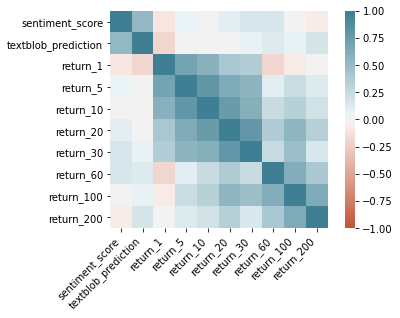

In [4]:
data_corr = data.drop(['ticker', 'date'], axis=1)
corr = data[[i for i in data_corr.columns]].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [5]:
corr.loc["sentiment_score"]

sentiment_score        1.000000
textblob_prediction    0.536608
return_1              -0.103774
return_5               0.051338
return_10              0.014025
return_20              0.090547
return_30              0.169293
return_60              0.161759
return_100             0.023698
return_200            -0.051425
Name: sentiment_score, dtype: float64

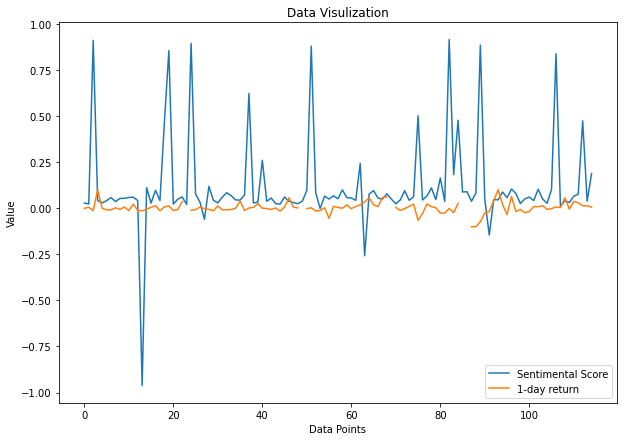

In [6]:
plt.figure(figsize=(10, 7))
data = data.sort_values(by="date")
plt.plot(range(data.shape[0]), data["sentiment_score"].values, label="Sentimental Score")
plt.plot(range(data.shape[0]), data["return_1"].values, label="1-day return")
plt.ylabel('Value')
plt.xlabel('Data Points')
plt.title("Data Visulization")
plt.legend()

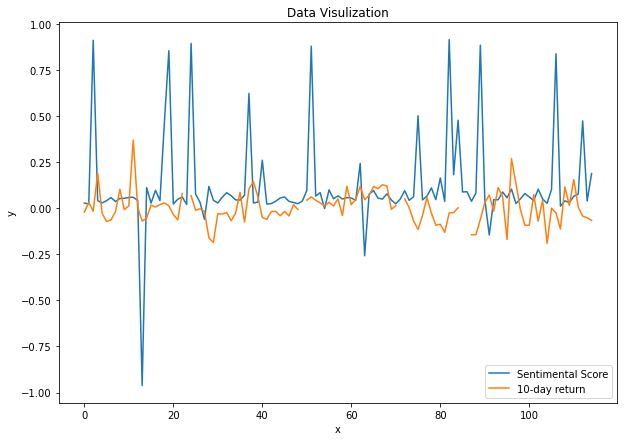

In [7]:
plt.figure(figsize=(10, 7))
data = data.sort_values(by="date")
plt.plot(range(data.shape[0]), data["sentiment_score"].values, label="Sentimental Score")
plt.plot(range(data.shape[0]), data["return_10"].values, label="10-day return")
plt.ylabel('y')
plt.xlabel('x')
plt.title("Data Visulization")
plt.legend()

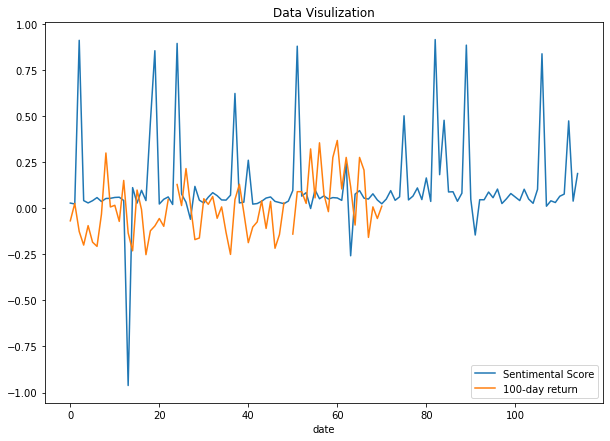

In [8]:
plt.figure(figsize=(10, 7))
plt.plot(range(data.shape[0]), data["sentiment_score"].values, label="Sentimental Score")
plt.plot(range(data.shape[0]), data["return_100"].values, label="100-day return")
plt.xlabel('date')
plt.title("Data Visulization")
plt.legend()

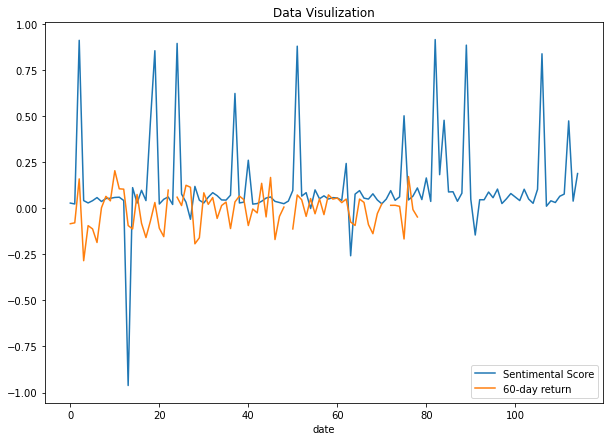

In [9]:
plt.figure(figsize=(10, 7))
# plt.scatter(x = range(data.shape[0]), y = data["sentiment_score"].values, label="Sentimental Score")
# plt.scatter(x = range(data.shape[0]), y = data["return_1"].values, label="1-day return")
plt.plot(range(data.shape[0]), data["sentiment_score"].values, label="Sentimental Score")
plt.plot(range(data.shape[0]), data["return_60"].values, label="60-day return")
plt.xlabel('date')
plt.title("Data Visulization")
plt.legend()

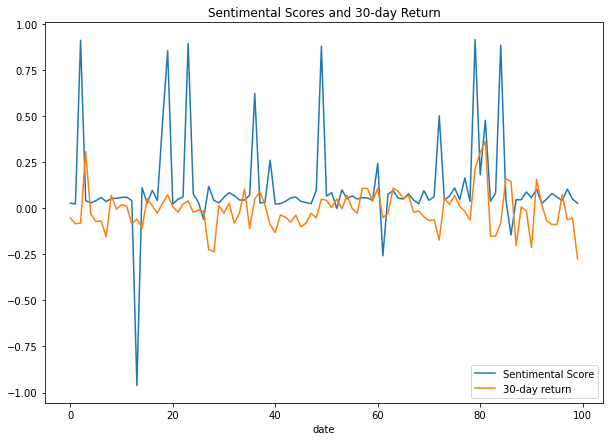

In [10]:
plt.figure(figsize=(10, 7))
# plt.scatter(x = range(data.shape[0]), y = data["sentiment_score"].values, label="Sentimental Score")
# plt.scatter(x = range(data.shape[0]), y = data["return_1"].values, label="1-day return")
index = np.argwhere(~np.isnan(data["return_30"].values))
plt.plot(range(data["sentiment_score"].values[index].shape[0]), data["sentiment_score"].values[index], label="Sentimental Score")
plt.plot(range(data["sentiment_score"].values[index].shape[0]), data["return_30"].values[index], label="30-day return")
plt.xlabel('date')
plt.title("Sentimental Scores and 30-day Return")
plt.legend()

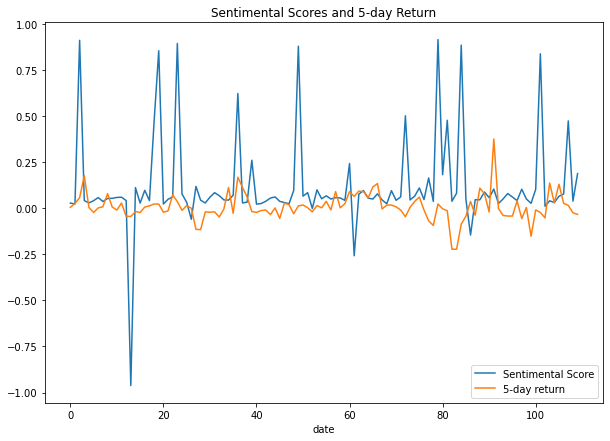

In [11]:
plt.figure(figsize=(10, 7))
# plt.scatter(x = range(data.shape[0]), y = data["sentiment_score"].values, label="Sentimental Score")
# plt.scatter(x = range(data.shape[0]), y = data["return_1"].values, label="1-day return")
index = np.argwhere(~np.isnan(data["return_1"].values))
plt.plot(range(data["sentiment_score"].values[index].shape[0]), data["sentiment_score"].values[index], label="Sentimental Score")
plt.plot(range(data["sentiment_score"].values[index].shape[0]), data["return_5"].values[index], label="5-day return")
plt.xlabel('date')
plt.title("Sentimental Scores and 5-day Return")
plt.legend()

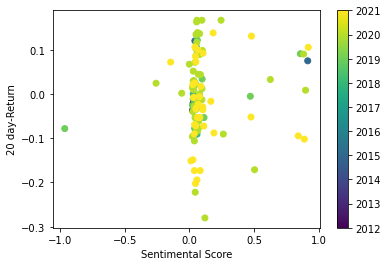

In [12]:
plt.scatter(data["sentiment_score"].values, data["return_20"].values, c=data["date"]//10000)
plt.ylabel('20 day-Return')
plt.xlabel('Sentimental Score')
plt.colorbar()

In [13]:
data = pd.read_csv('/Users/zengxin/Study/Econ2355/result/corr_final.csv', index_col="Unnamed: 0")

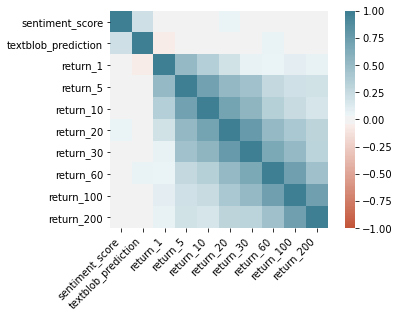

In [14]:
data_corr = data.drop(['ticker', 'date'], axis=1)
corr = data[[i for i in data_corr.columns]].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [15]:
data_after_2018 = data[data.date >= 20190101]

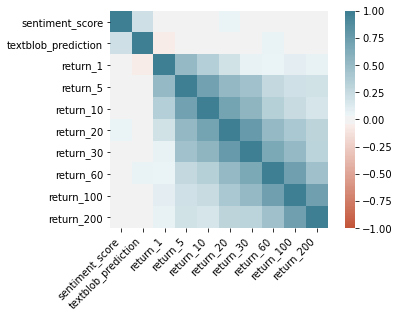

In [16]:
data_corr = data_after_2018.drop(['ticker', 'date'], axis=1)
corr_2018 = data_after_2018[[i for i in data_corr.columns]].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [17]:
corr_2018.loc["sentiment_score"][:9]

sentiment_score        1.000000
textblob_prediction    0.184884
return_1               0.010871
return_5              -0.016624
return_10              0.010887
return_20              0.073622
return_30              0.072292
return_60              0.073875
return_100             0.000638
Name: sentiment_score, dtype: float64

Text(0, 0.5, 'Correlation')

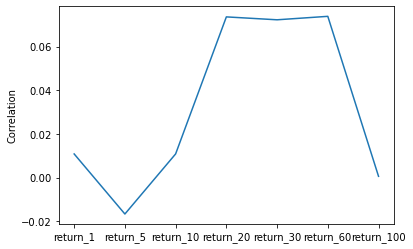

In [18]:
plt.plot(corr_2018.loc["sentiment_score"].values[2:9])
plt.xticks(np.arange(7), corr_2018.index[2:9])
plt.ylabel('Correlation')

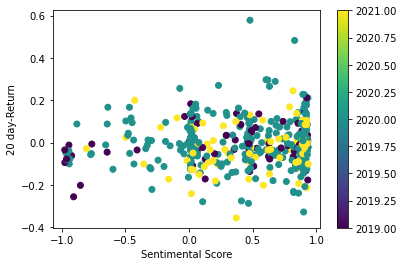

In [19]:
plt.scatter(data_after_2018["sentiment_score"].values, data_after_2018["return_20"].values, c=data_after_2018["date"]//10000)
plt.ylabel('20 day-Return')
plt.xlabel('Sentimental Score')
plt.colorbar()

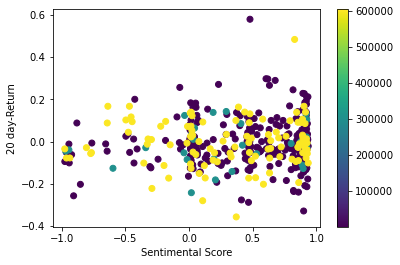

In [20]:
plt.scatter(data_after_2018["sentiment_score"].values, data_after_2018["return_20"].values, c=data_after_2018["ticker"].astype(int))
plt.ylabel('20 day-Return')
plt.xlabel('Sentimental Score')
plt.colorbar()

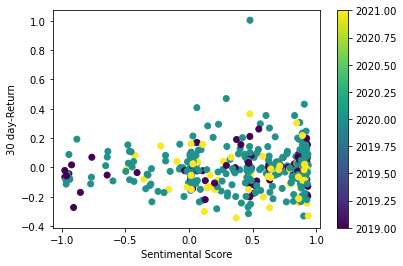

In [21]:
plt.scatter(data_after_2018["sentiment_score"].values, data_after_2018["return_30"].values, c=data_after_2018["date"]//10000)
plt.ylabel('30 day-Return')
plt.xlabel('Sentimental Score')
plt.colorbar()

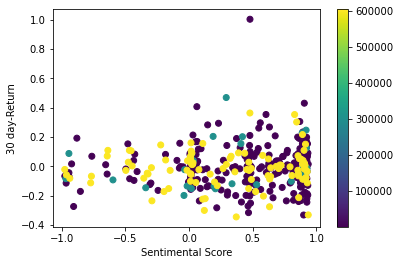

In [22]:
plt.scatter(data_after_2018["sentiment_score"].values, data_after_2018["return_30"].values, c=data_after_2018["ticker"].astype(int))
plt.ylabel('30 day-Return')
plt.xlabel('Sentimental Score')
plt.colorbar()